In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('online_retail.csv', encoding = 'latin1')

df.shape #Shape rows X columns
df.info() #Column Info
df.describe() #Summary Statistics

#Missing Values
df.isnull().sum()

#Remove Missing CustomerID
df = df.dropna(subset=['CustomerID'])

#Remove Duplicates
df = df.drop_duplicates()

#Fix DataTypes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

#Remove Invalid Rows
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Revenue Column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

#Extract Time Features
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [30]:
import os
os.getcwd()

import os
os.makedirs("visuals", exist_ok=True)





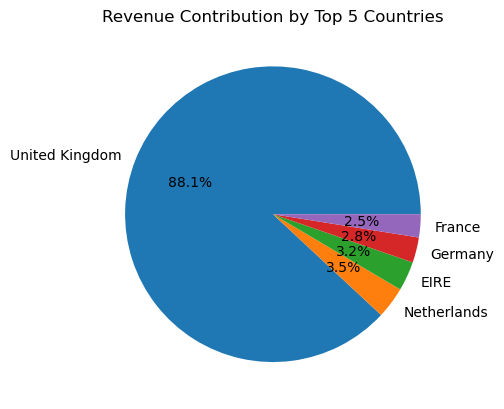

In [31]:
#Revenue Contribution by Country


top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure()
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Revenue Contribution by Top 5 Countries')
plt.savefig("visuals/pie_top_countries.png", dpi=300, bbox_inches='tight')
plt.show()


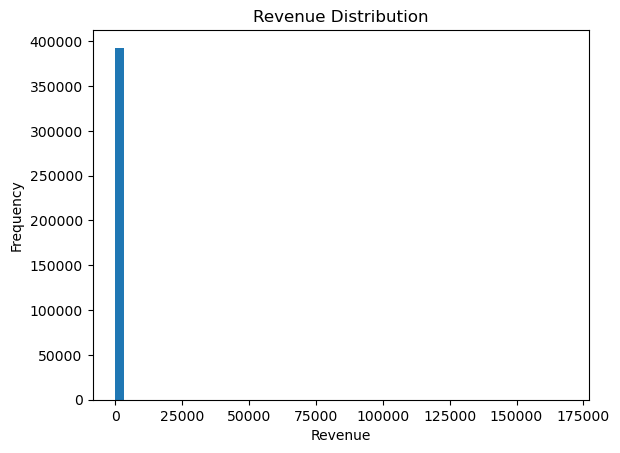

In [32]:
#Revenue Distribution

plt.figure()
plt.hist(df['Revenue'], bins=50)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution')
plt.savefig('Revenue_Histogram.png',  dpi=300, bbox_inches='tight')
plt.show()


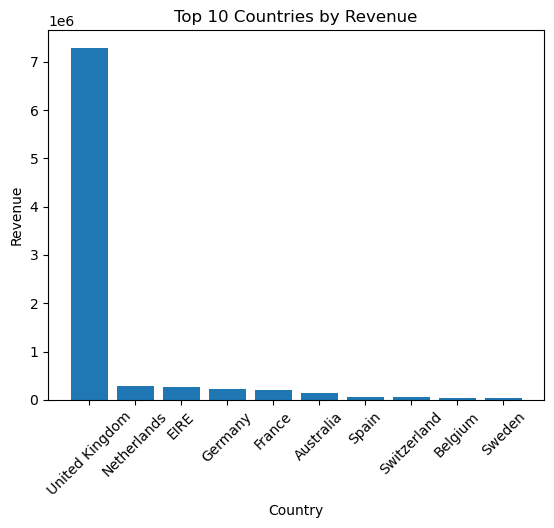

In [33]:
#Country Comparison

top10_country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10_country_revenue.index, top10_country_revenue.values)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 10 Countries by Revenue')
plt.xticks(rotation=45)

plt.savefig('Top_10_Countries_Revenue.png',  dpi=300, bbox_inches='tight')
plt.show()


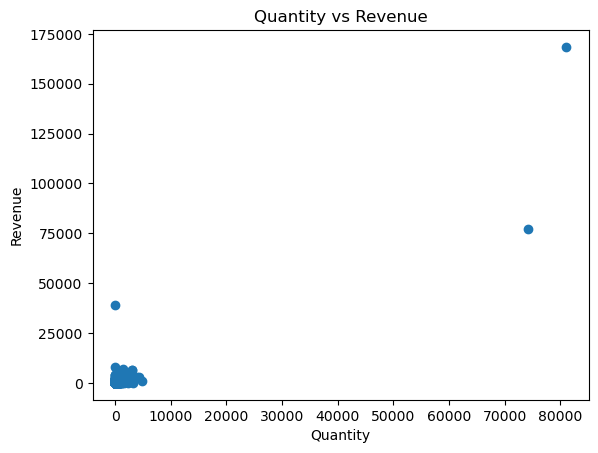

In [34]:
#Quantity vs Revenue

plt.figure()
plt.scatter(df['Quantity'], df['Revenue'])
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Quantity vs Revenue')

plt.savefig('Quantity_vs_Revenue_Scatter.png',  dpi=300, bbox_inches='tight')
plt.show()


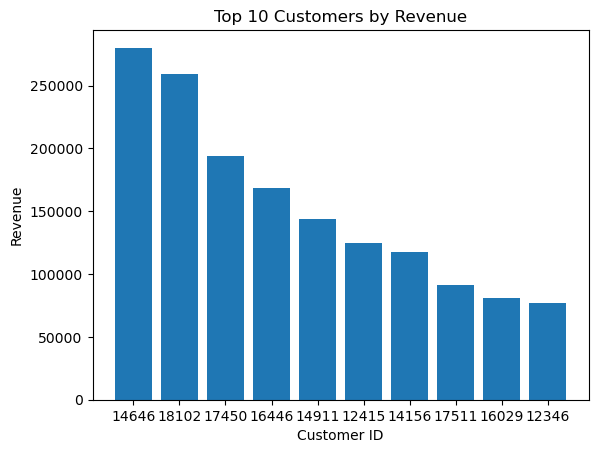

In [35]:
#TOP 10 Customers By Revenue

top10_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10_customers.index.astype(str), top10_customers.values)
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('Top 10 Customers by Revenue')

plt.savefig('Top_10_Customers_Revenue.png',  dpi=300, bbox_inches='tight')
plt.show()




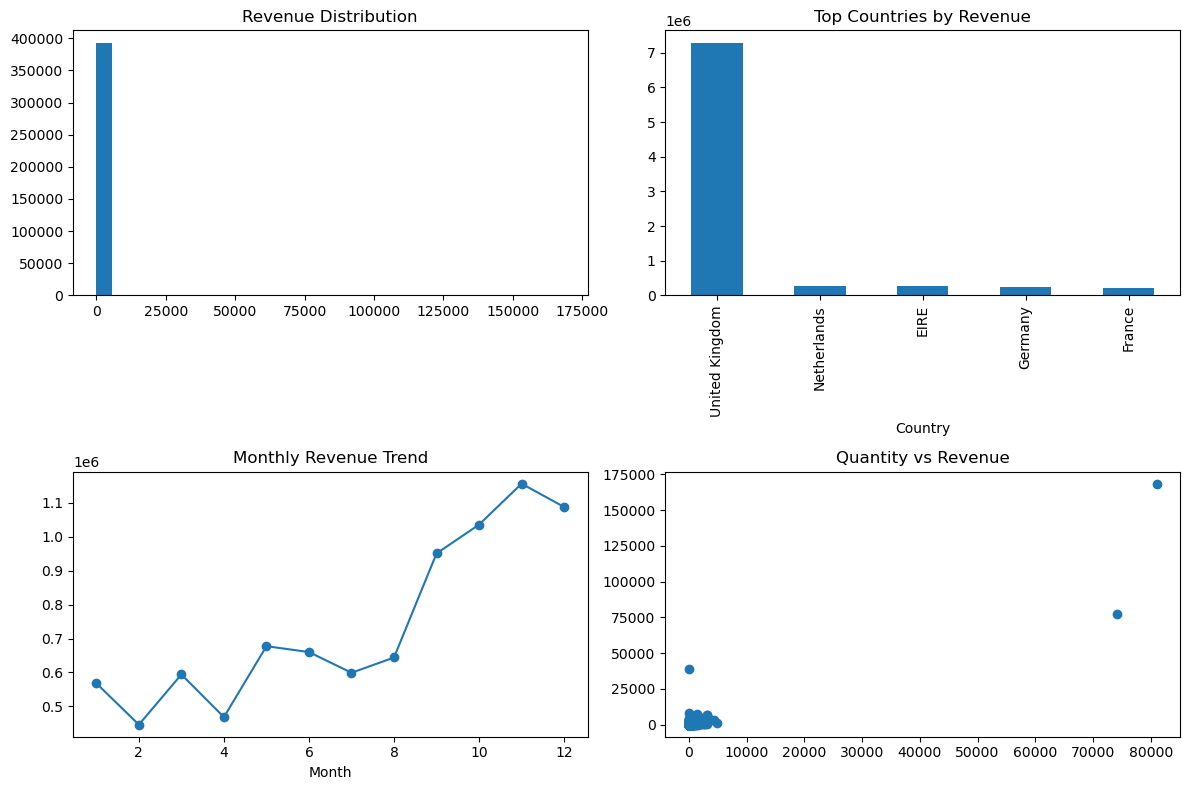

In [37]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12,8))

# Plot 1: Revenue Histogram
plt.subplot(2,2,1)
plt.hist(df['Revenue'], bins=30)
plt.title('Revenue Distribution')

# Plot 2: Top Countries
plt.subplot(2,2,2)
top_countries.plot(kind='bar')
plt.title('Top Countries by Revenue')

# Plot 3: Monthly Revenue Trend
plt.subplot(2,2,3)
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend')

# Plot 4: Quantity vs Revenue
plt.subplot(2,2,4)
plt.scatter(df['Quantity'], df['Revenue'])
plt.title('Quantity vs Revenue')

plt.tight_layout()
plt.savefig('EDA_Subplots_Summary.png', dpi=300, bbox_inches='tight')
plt.show()
